In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

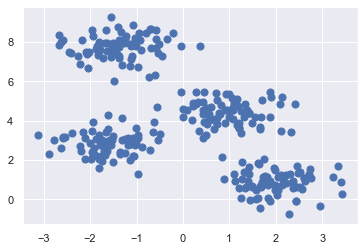

In [8]:
# for ploting style
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [5]:
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3])

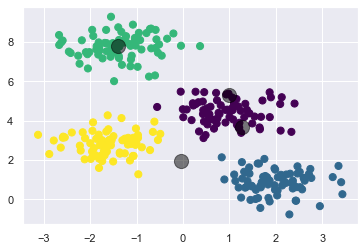

In [13]:
from sklearn.metrics import pairwise_distances_argmin 
def find_clusters(X,n_clusters,rseed =2):
    
    # 1 randomly choosing cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0]) [:n_clusters]
    centers =X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                           for i in range (n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

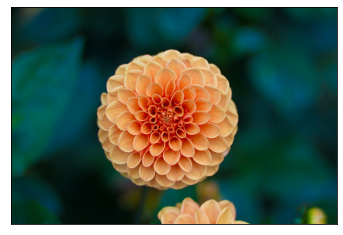

In [2]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [3]:
china.shape

(427, 640, 3)

In [4]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [5]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [6]:
def plot_pixels(data, title, color=None, N=10000):
    if color is None:
        colors = data
        
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
        
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red',ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        
        ax[1].scatter(R, G, color=colors, marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        
        fig.suptitle(title, size=20);

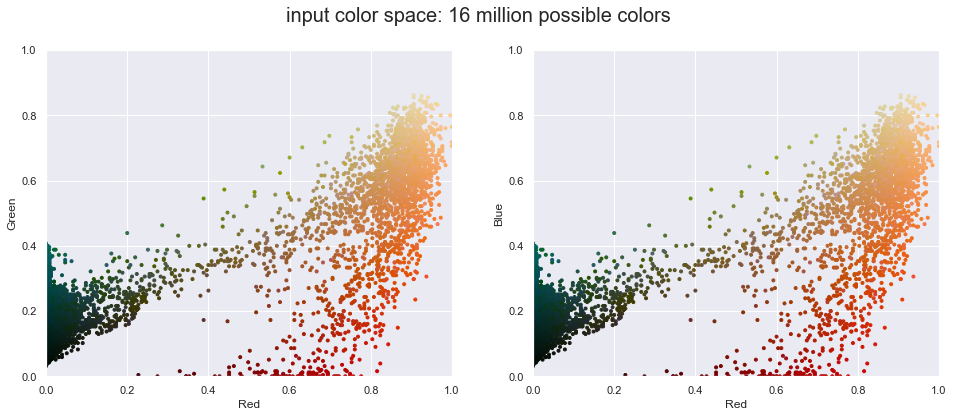

In [10]:
plot_pixels(data, title='input color space: 16 million possible colors')

In [15]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, color = new_colors,
            title="Reduce color space: 16 colors")

In [13]:
china_recolored = new_colors.reshape(china.reshape)

fig, ax = plt.suplots(1, 2, figsize=(16, 6),
                     subplot_kw=dict(xticks=[], yticks=[]))
fig.subplot_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Origianl Image', size = 16)
ax[0].imshow(china_recolored)
ax[0].set_title('16 color Image', size = 16);

TypeError: expected sequence object with len >= 0 or a single integer

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('diabetes.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'